#**Domain - Data Science Intern**
##Phase 1 Project (Golden Task) - Breast Cancer Prediction
##Dataset - breast-cancer form Kaggle

# Install kaggle and download dataset

In [1]:
#install the kaggle
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amanawadhiya","key":"3663da6d55a200b3d1bb6d0698b8c4a5"}'}

In [3]:
# Create a kaggle folder and copy the kaggle.json to folder kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [4]:
# Permisson for the kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Breast Cancer Dataset download
! kaggle datasets download yasserh/breast-cancer-dataset

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 109MB/s]


In [6]:
# unzip the downloaded dataset
! unzip breast-cancer-dataset.zip

Archive:  breast-cancer-dataset.zip
  inflating: breast-cancer.csv       


# Importing libraries for data analysis

In [7]:
#Import useful libraries
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [8]:
# Read the dataset
ds=pd.read_csv("/content/breast-cancer.csv")

In [9]:
# Overview of dataset
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
#shape of dataset
print('Number of rows and columns in dataset: ',ds.shape)

Number of rows and columns in dataset:  (569, 32)


In [11]:
# Information about columns
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
# diagnosis column object to integer
ds['diagnosis'] = ds['diagnosis'].map({'M':1,'B':0})
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
ds['diagnosis'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [14]:
# Checking for null values

ds.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

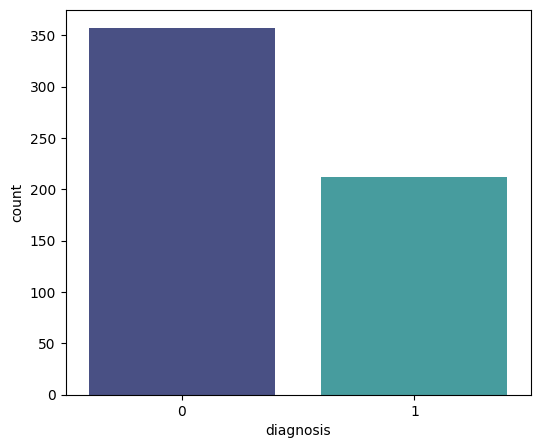

In [15]:
plt.figure(figsize = (6,5))
sns.countplot(x="diagnosis", data=ds, palette='mako')
plt.show()

# Data Visualization

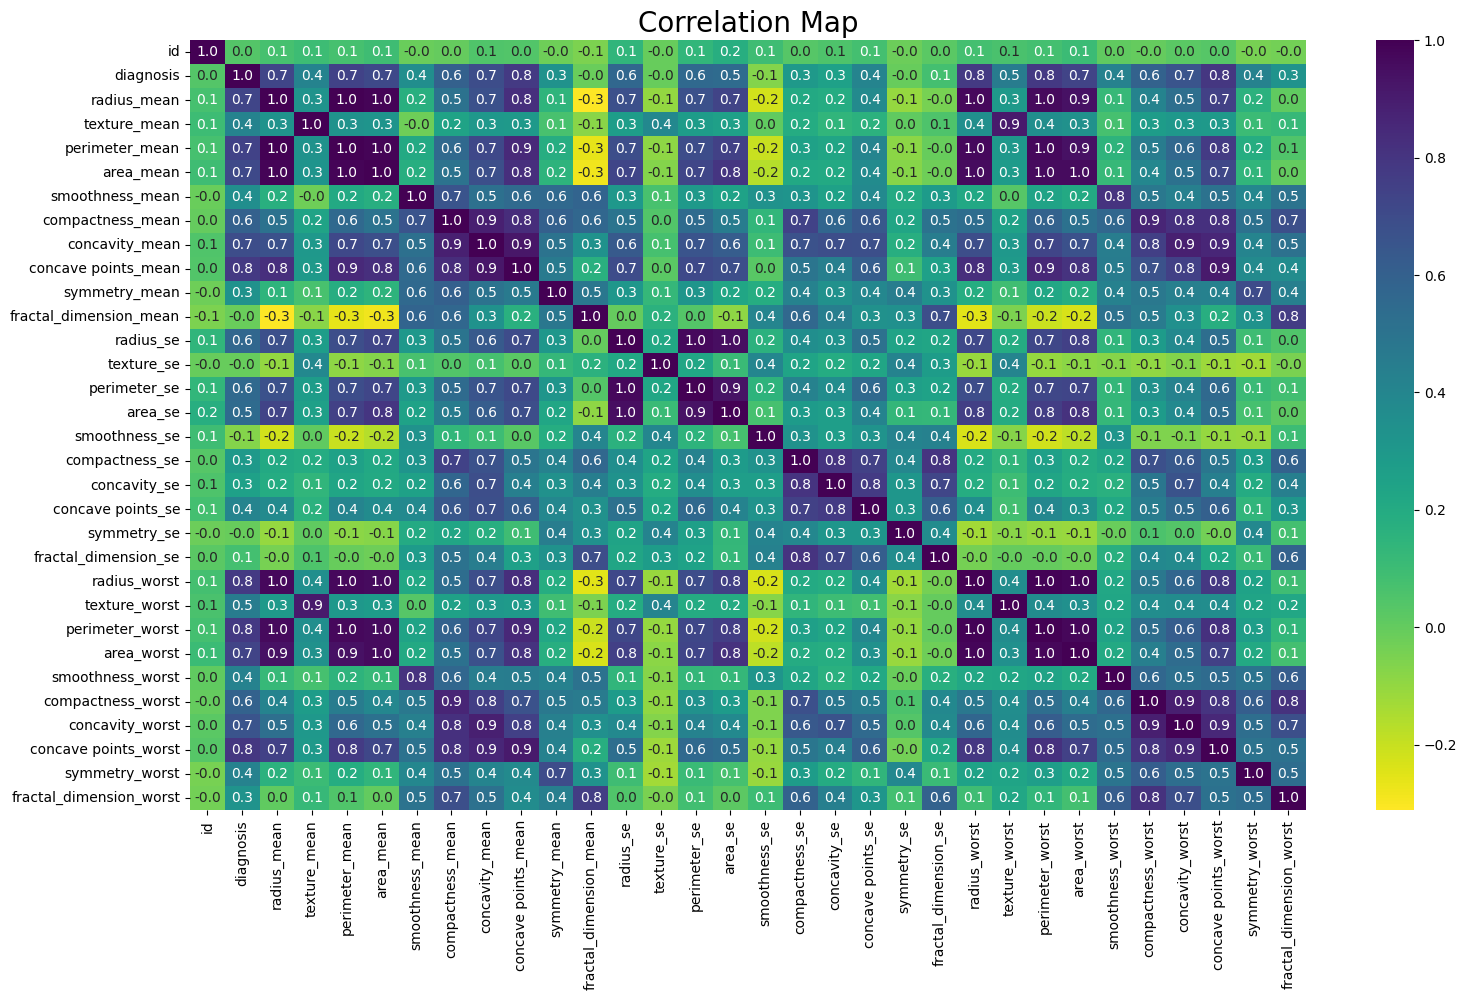

In [16]:
# Displaying the correlation using heatmap

plt.figure(figsize=(18,10))
corr = ds.corr()
sns.heatmap(corr, cmap='viridis_r', annot = True, fmt=".1f")
plt.title("Correlation Map", fontsize=20)
plt.show()

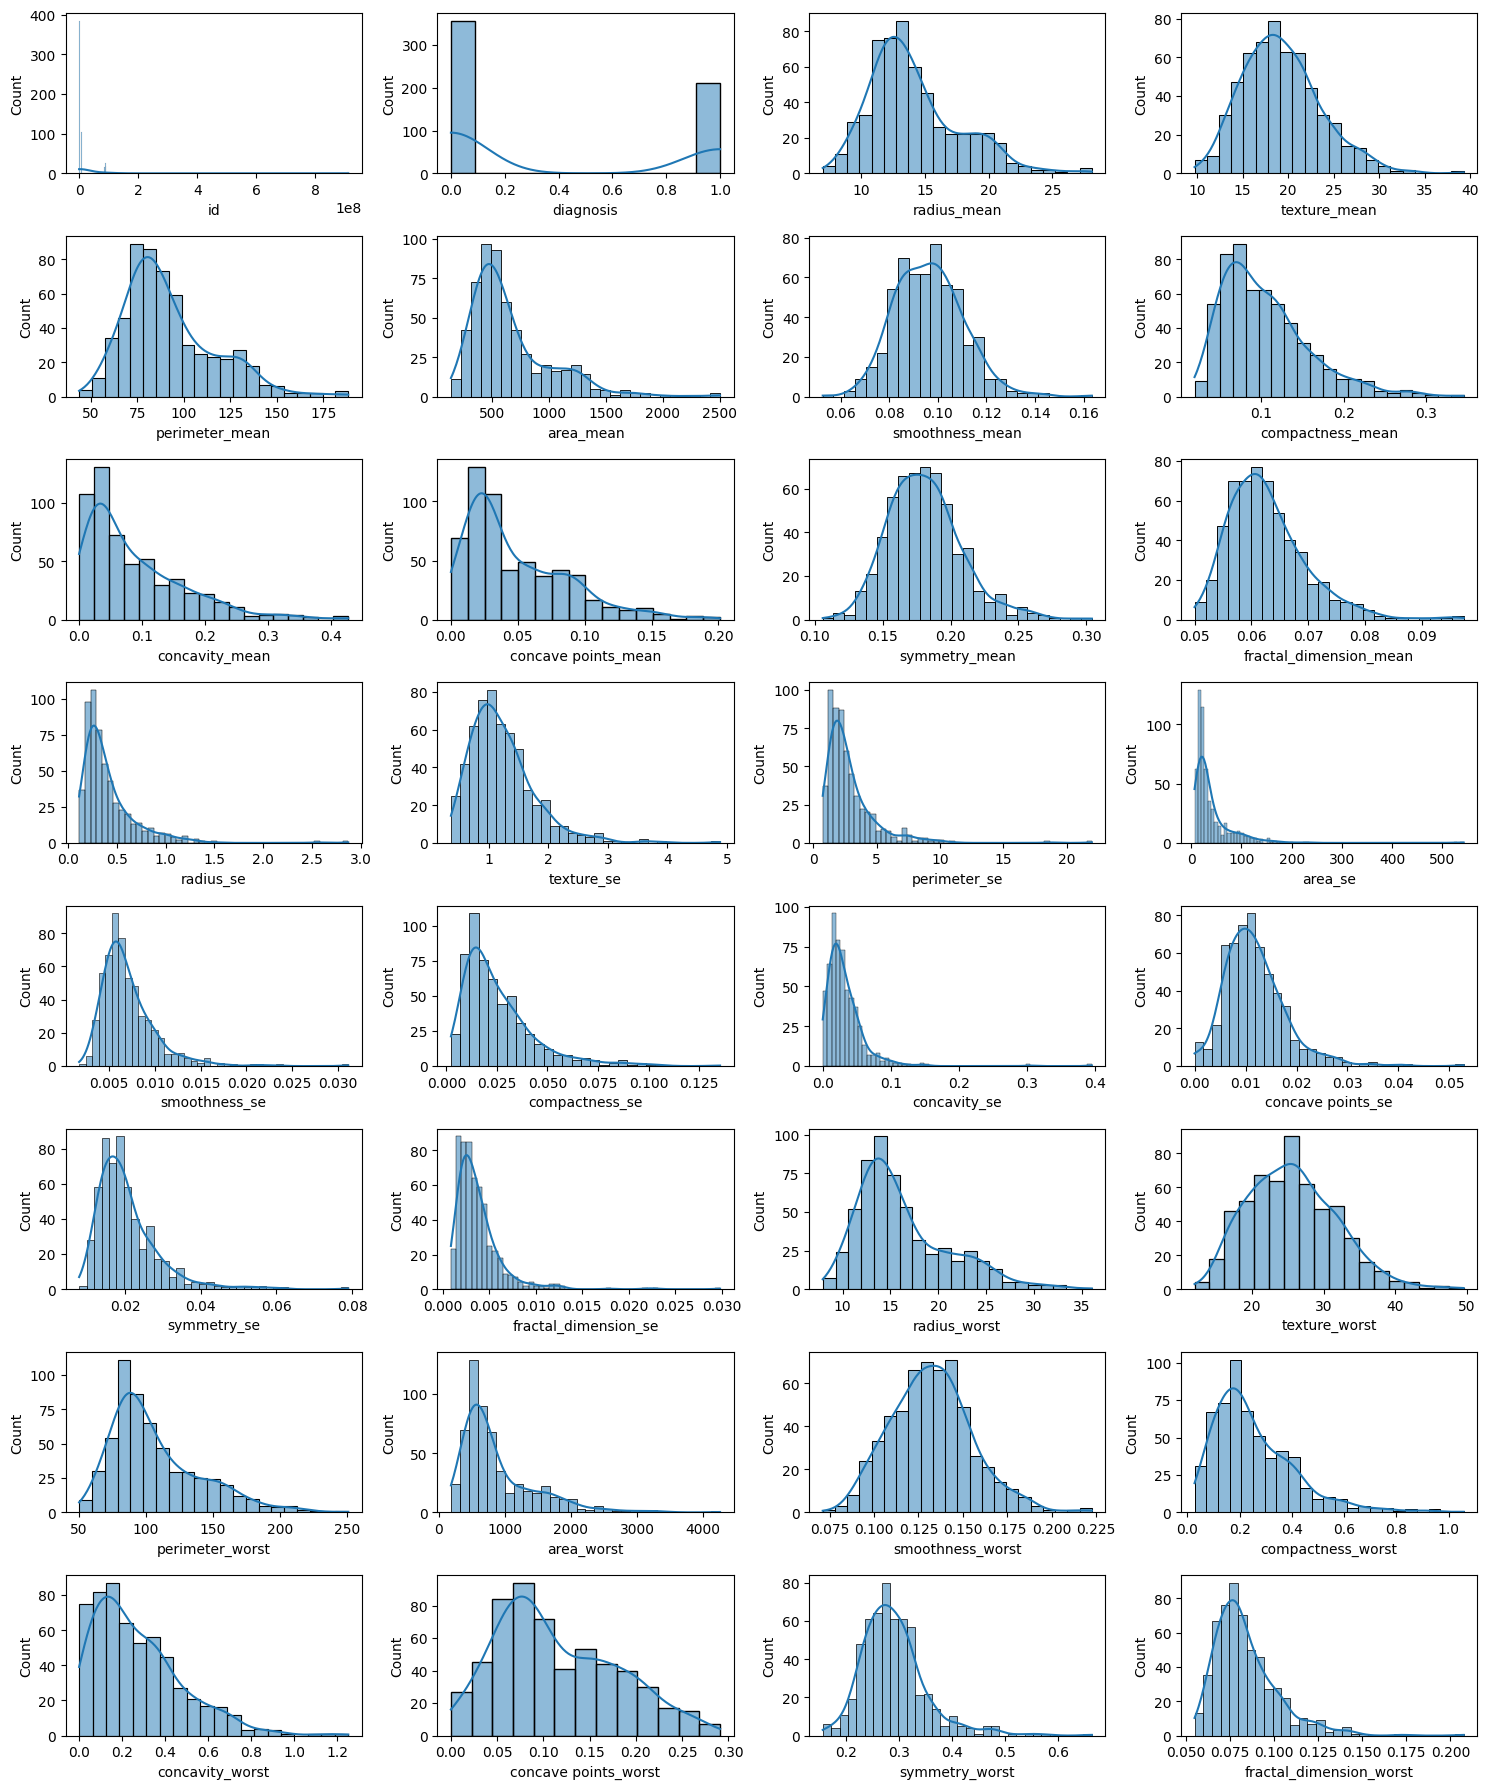

In [17]:
# Finding the Distribution of data
plt.figure(figsize=(15, 18))
plotnumber = 1
for col in ds.columns:
    if plotnumber <= 32:
        ax = plt.subplot(8, 4, plotnumber)
        sns.histplot(ds[col], kde=True)
        plt.xlabel(col, fontsize=10)
    plotnumber += 1
plt.tight_layout()
plt.show()

#MODEL TRAINING AND TESTING

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
# Separating X and Y data from dataset

X=ds.drop(['diagnosis'],axis=1)
Y=ds.diagnosis

In [20]:
# Splitting data into training and testing data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# Standardizing the training and testing data
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [21]:
from sklearn.metrics import accuracy_score
def models(X_train,Y_train):

    from sklearn.tree import DecisionTreeClassifier
    d_tree=DecisionTreeClassifier()  #random_state=0,criterion="entropy"
    d_tree.fit(X_train,Y_train)
    Y_pred= d_tree.predict(X_test)
    dt_acc= accuracy_score(Y_test, Y_pred)
    acc.append(dt_acc*100)

    from sklearn.linear_model import LogisticRegression
    lreg=LogisticRegression()
    lreg.fit(X_train,Y_train)
    Y_pred = lreg.predict(X_test)
    lr_acc = accuracy_score(Y_test, Y_pred)
    acc.append(lr_acc*100)

    from sklearn.ensemble import RandomForestClassifier
    rf=RandomForestClassifier()
    rf.fit(X_train,Y_train)
    Y_pred = rf.predict(X_test)
    rf_acc = accuracy_score(Y_test, Y_pred)
    acc.append(rf_acc*100)

    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(X_train,Y_train)
    Y_pred = nb.predict(X_test)
    nb_acc = accuracy_score(Y_test,Y_pred)
    acc.append(nb_acc*100)

    from sklearn.neighbors import KNeighborsClassifier
    knn= KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    knn_acc = accuracy_score(Y_test, Y_pred)
    acc.append(knn_acc*100)

    from sklearn.svm import SVC   #support vector classifier
    svm = SVC()
    svm.fit(X_train, Y_train)
    Y_pred = svm.predict(X_test)
    svm_acc = accuracy_score(Y_test,Y_pred)
    acc.append(svm_acc*100)

    print("Accuracy of Decision Tree Classifier:",dt_acc*100,"%")
    print("Accuracy of Logistic Regression :",lr_acc*100, "%")
    print("Accuracy of Random Forest Classifier:", rf_acc*100,"%")
    print("Accuracy of Naive Bayes:", nb_acc*100,"%")
    print("Accuracy of K Nearest Neighbor :",knn_acc*100, "%")
    print("Accuracy of Support Vector Classifier:",svm_acc*100,"%")

acc = []
model=models(X_train,Y_train)

Accuracy of Decision Tree Classifier: 93.00699300699301 %
Accuracy of Logistic Regression : 98.6013986013986 %
Accuracy of Random Forest Classifier: 96.5034965034965 %
Accuracy of Naive Bayes: 95.1048951048951 %
Accuracy of K Nearest Neighbor : 95.8041958041958 %
Accuracy of Support Vector Classifier: 97.2027972027972 %


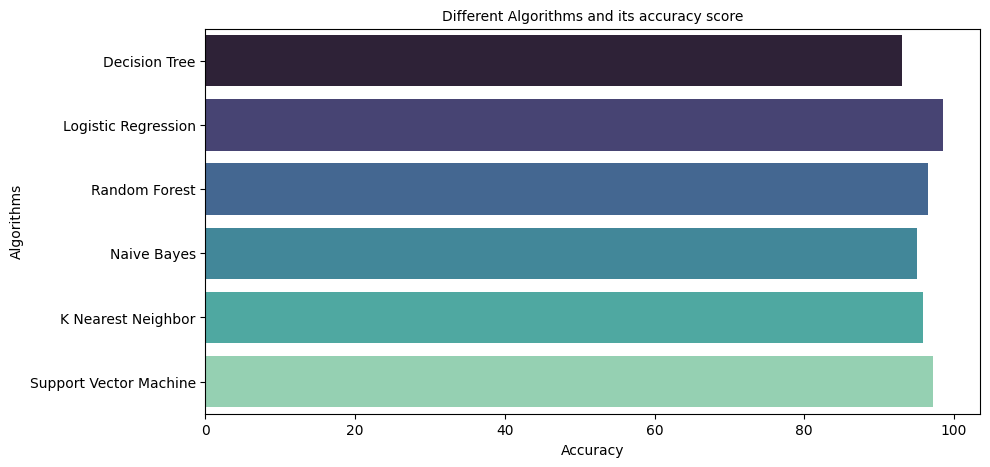

In [22]:
plt.figure(figsize = (10,5))
alg = ['Decision Tree','Logistic Regression','Random Forest','Naive Bayes','K Nearest Neighbor','Support Vector Machine']
sns.barplot(x = acc, y=alg, palette='mako')
plt.title('Different Algorithms and its accuracy score', fontsize=10)
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
plt.show()

Since the Logistic Regression has highest accuracy, we can do Evaluation metrics  on our model

In [23]:

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(X_train,Y_train)
Y_pred = lreg.predict(X_test)
report=classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.96      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

